c:\Users\f1soft\anaconda3\envs\python-39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of XLMRobertaXLForSequenceClassification were not initialized from the model checkpoint at facebook/xlm-roberta-xl and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


입력 문장: 과학입니다.
정치: 0.200
비즈니스: 0.200
교육: 0.200
기술: 0.200
과학: 0.200


c:\Users\f1soft\anaconda3\envs\python-39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\f1soft\anaconda3\envs\python-39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\f1soft\anaconda3\envs\python-39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\f1soft\anaconda3\envs\python-39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\f1soft\anaconda3\envs\python-39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45768 (\N{HANGUL S

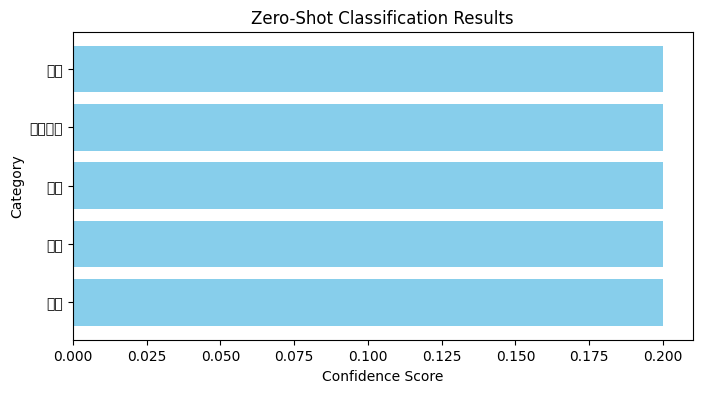

In [1]:
import torch
from transformers import pipeline
import matplotlib.pyplot as plt

def plot_results(labels, scores):
    """분류 결과를 막대 그래프로 시각화"""
    plt.figure(figsize=(8, 4))
    plt.barh(labels, scores, color='skyblue')
    plt.xlabel("Confidence Score")
    plt.ylabel("Category")
    plt.title("Zero-Shot Classification Results")
    plt.gca().invert_yaxis()
    plt.show()

# 모델: xlm-roberta-xl 사용
classifier = pipeline("zero-shot-classification", model="facebook/xlm-roberta-xl")

# 예측할 문장 및 카테고리 설정
sequence_to_classify = "과학입니다."
candidate_labels = ["과학", "기술", "교육", "비즈니스", "정치"]

# 모델 실행
output = classifier(sequence_to_classify, candidate_labels)

# 결과 출력
sequence = output["sequence"]
labels = output["labels"]
scores = output["scores"]

print(f"입력 문장: {sequence}")
for label, score in zip(labels, scores):
    print(f"{label}: {score:.3f}")

# 결과 시각화
plot_results(labels, scores)
